In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import StandardScaler




   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Text(0.5, 1.0, 'valor medio da casa x reda media')

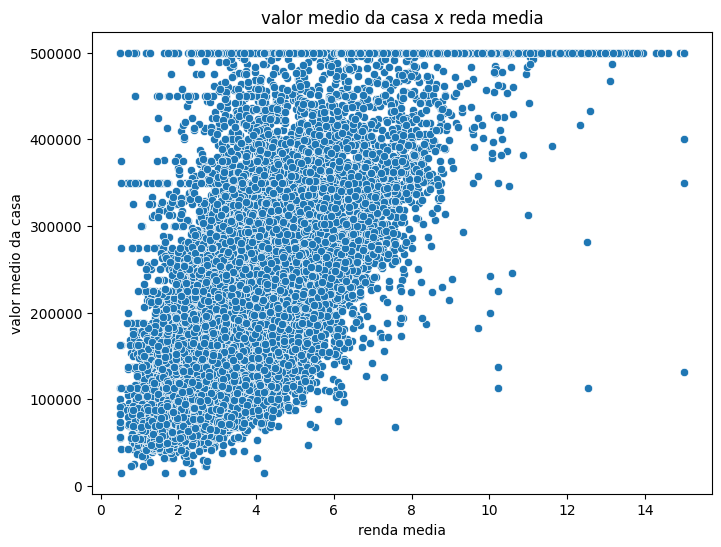

In [134]:
# Analise exploratoria 
df = pd.read_csv("housing.csv") #importa o arquivo e cria um dataframe 
print(df.head())

plt.figure(figsize=(8, 6)) # defini o tamanho do grafico que ira 'plota'
sns.scatterplot(x=df['median_income'], y=df['median_house_value']) # cria um grafico de dispersao definido x e y
plt.ylabel('valor medio da casa') # nomeia o eixo y 
plt.xlabel('renda media') # nomeia o eixo x
plt.title('valor medio da casa x reda media') # da um titulo para o grafico 


In [135]:
# Divisao dos dados 

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42) #dividir os dados em treino e teste 
print(len(train_set), len(test_set)) # mostra o tamnho de cada conjunto 

16512 4128


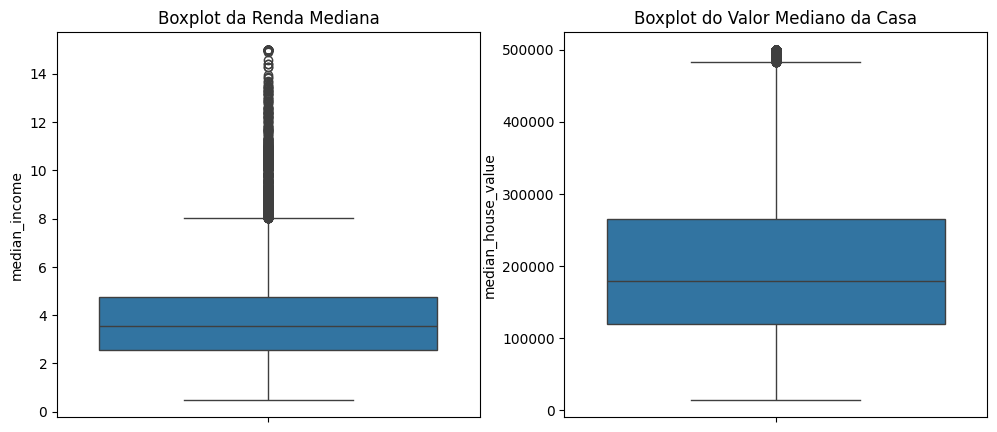

In [136]:
# Análise de outliers
plt.figure(figsize=(12, 5)) # define o tamanho do grafico
plt.subplot(1, 2, 1) # define a posicao do grafico

sns.boxplot(y=df['median_income']) # cria um boxplot com a coluna de renda media
plt.title("Boxplot da Renda Mediana") # nomeia o grafico 
plt.subplot(1, 2, 2) # define a posicao do grafico 
sns.boxplot(y=df['median_house_value']) # cria um boxplot com a valor medio da casa 
plt.title("Boxplot do Valor Mediano da Casa") # nomeia o grafico 
plt.show()


In [137]:
z_scores_income = stats.zscore(df['median_income']) # usa o metodo zscore para calcular os zscores da renda media
z_scores_house_valu = stats.zscore(df['median_house_value']) # calcula os zscores do valor medio da casa 


outliers_income = [df['median_income'][i] for i, z in enumerate(z_scores_income) if abs(z) > 3] # pega os valores que sao outliers e adiciona a uma lista
outliers_house_value = [df['median_house_value'][i] for i, z in enumerate(z_scores_house_valu) if abs(z) > 3] #pega os valores que sao outliers e adiciona a uma lista 

print(f'Outliers da renda media: {outliers_income}') # mostra os outliers da renda media 
print(f'Outliers da renda media: {outliers_house_value}')  # mostra os outliers do valor medio da casa 

# removendo outliers

df = df[~df['median_income'].isin(outliers_income)] # remove outliers da renda media 
print(df['median_income'].isin(outliers_income)) # mostra os outlier removidos 

Outliers da renda media: [11.6017, 10.0825, 11.8603, 13.499, 12.2138, 12.3804, 9.7194, 10.9506, 10.3203, 9.5862, 9.7037, 10.3345, 12.5915, 15.0001, 9.8708, 10.7372, 13.4883, 12.2478, 10.4549, 10.3224, 10.3713, 11.7064, 11.3421, 10.9405, 10.3416, 10.5815, 13.2949, 13.1499, 10.5144, 10.0263, 10.5941, 10.8805, 10.9052, 9.6047, 11.2093, 9.6465, 10.9201, 10.5511, 13.4196, 10.3587, 10.6796, 11.2979, 12.8879, 10.2292, 10.4399, 10.0549, 10.3599, 10.9237, 10.5575, 12.7823, 12.8763, 12.9591, 10.3661, 11.615, 15.0001, 10.2264, 15.0001, 15.0001, 15.0001, 11.2185, 15.0001, 10.586, 15.0001, 15.0001, 12.3767, 12.7296, 9.7449, 15.0001, 15.0001, 11.8442, 11.1978, 13.2935, 10.7937, 12.8665, 15.0001, 13.5728, 13.947, 15.0, 11.2866, 11.4233, 10.8082, 13.6842, 15.0001, 10.1882, 15.0001, 15.0001, 10.3467, 14.2867, 10.8045, 12.8483, 10.9805, 11.1768, 10.4519, 10.0, 12.0088, 12.1579, 9.5823, 11.1077, 10.1248, 9.7066, 9.8098, 15.0001, 15.0001, 10.2289, 9.8413, 15.0001, 15.0001, 15.0001, 11.7894, 10.7397, 11.70

In [ ]:


# Garantir que 'ocean_proximity' foi processado corretamente, pois tive problema com o dtype de 'ocean_proximity'
if 'ocean_proximity' in train_set.columns:# verifica se a coluna esta no conjunto de dados
    encoder = OneHotEncoder(drop='first', sparse_output=False) # cria um objeto do tipo OneHotEncoder
    encoded_features = encoder.fit_transform(train_set[['ocean_proximity']]) # aplica o metodo fit_transform para codificar a coluna 
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['ocean_proximity'])) # cria um dataframe com as colunas codificadas

    # Remover coluna categórica e adicionar colunas numéricas codificadas
    train_set = train_set.drop(columns=['ocean_proximity']).reset_index(drop=True) # remove a coluna
    train_set = pd.concat([train_set, encoded_df], axis=1)# adiciona as colunas codificadas ao conjunto de dados 

    encoded_features_test = encoder.transform(test_set[['ocean_proximity']]) # aplica o meto transform para codificar a coluna 
    encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoder.get_feature_names_out(['ocean_proximity'])) # cria um dataframe com as colunas codificadas
    test_set = test_set.drop(columns=['ocean_proximity']).reset_index(drop=True) # remove a coluna 
    test_set = pd.concat([test_set, encoded_df_test], axis=1) # adiciona as colunas codificadas ao conjunto de dados 

# Separar features e target
X_train_all = train_set.drop(columns=['median_house_value']) # pega todas as colunas menos a coluna de valor medio da casa 
X_test_all = test_set.drop(columns=['median_house_value']) # pega todas as colunas menos a coluna de valor medio da casa 

# Preencher valores ausentes com a média
imputer = SimpleImputer(strategy='mean') # cria um objeto do tipo SimpleImputer
X_train_all = imputer.fit_transform(X_train_all) # aplica o metodo fit_transform para preencher os valores ausentes 
X_test_all = imputer.transform(X_test_all) # aplica o metodo transform para preencher os valores ausentes 

# Treinar o modelo
model_lr_all = LinearRegression() # cria um objeto do tipo linearegression
model_lr_all.fit(X_train_all, train_set['median_house_value']) # treina o modelo
y_pred_lr_all = model_lr_all.predict(X_test_all) # faz a predicao 



In [ ]:

X_train_all = pd.DataFrame(X_train_all) # cria um dataframe com dados de treino 
X_test_all = pd.DataFrame(X_test_all) # cria um dataframe com dados de teste

print("Treino - Valores NaN por coluna:\n", X_train_all.isna().sum()) # mostra os valores nulos por coluna do conjunto de treino 
print("\nTeste - Valores NaN por coluna:\n", X_test_all.isna().sum()) # mostra os valore nulos por coluna do conjunto de teste 

print("\nTotal de NaNs no Treino:", X_train_all.isna().sum().sum()) # mostra o total de valores nulos no conjunto de treino 
print("Total de NaNs no Teste:", X_test_all.isna().sum().sum()) # mostra  o total de valores nulos no conjunto de teste 
# O medelo de regressao linear nao permite valores nulos, entao usei para verificar



imputer = SimpleImputer(strategy="mean")  # Preenche NaN com a média

# Aplicar no conjunto de treino
X_train_all = pd.DataFrame(imputer.fit_transform(X_train_all), columns=X_train_all.columns)

# Aplicar no conjunto de teste (usando a média do treino)
X_test_all = pd.DataFrame(imputer.transform(X_test_all), columns=X_test_all.columns)

# Verificar se ainda há NaNs
print("\nTotal de NaNs no Treino (após imputação):", X_train_all.isna().sum().sum())
print("Total de NaNs no Teste (após imputação):", X_test_all.isna().sum().sum())

Treino - Valores NaN por coluna:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

Teste - Valores NaN por coluna:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

Total de NaNs no Treino: 0
Total de NaNs no Teste: 0

Total de NaNs no Treino (após imputação): 0
Total de NaNs no Teste (após imputação): 0


In [141]:
# analise de outliers

X_train_all = train_set.drop(columns=['median_house_value'])
X_test_all = test_set.drop(columns=['median_house_value'])


imputer = SimpleImputer(strategy='mean')
X_train_all = imputer.fit_transform(X_train_all)
X_test_all = imputer.transform(X_test_all)


In [130]:
# Seleção de variáveis e Regressão Linear
features_selected = ['median_income', 'housing_median_age', 'population']

# Se houver NaNs, preenche com a média (imputação)
imputer = SimpleImputer(strategy="mean")
X_train_selected = imputer.fit_transform(train_set[features_selected])
X_test_selected = imputer.transform(test_set[features_selected])

# Normalização dos dados
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

# Variável alvo
y_train = train_set['median_house_value']
y_test = test_set['median_house_value']

# Modelo com variáveis selecionadas
model_lr_selected = LinearRegression()
model_lr_selected.fit(X_train_selected, y_train)
y_pred_lr_selected = model_lr_selected.predict(X_test_selected)
mae_lr_selected = mean_absolute_error(y_test, y_pred_lr_selected)

print(f"MAE para modelo com variáveis selecionadas: {mae_lr_selected}")

# Modelo com todas as variáveis
X_train_all = train_set.drop(columns=['median_house_value'])
X_test_all = test_set.drop(columns=['median_house_value'])

# Imputação e normalização dos dados
X_train_all = imputer.fit_transform(X_train_all)
X_test_all = imputer.transform(X_test_all)

X_train_all = scaler.fit_transform(X_train_all)
X_test_all = scaler.transform(X_test_all)

# Modelo com todas as variáveis
model_lr_all = LinearRegression()
model_lr_all.fit(X_train_all, y_train)
y_pred_lr_all = model_lr_all.predict(X_test_all)
mae_lr_all = mean_absolute_error(y_test, y_pred_lr_all)

print(f"MAE para modelo com todas as variáveis: {mae_lr_all}")

MAE para modelo com variáveis selecionadas: 60457.31075648201
MAE para modelo com todas as variáveis: 50702.16891030995


In [131]:
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train_selected, y_train)
y_pred_tree = model_tree.predict(X_test_selected)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print(f"MAE para modelo de Árvore de Decisão: {mae_tree}")

MAE para modelo de Árvore de Decisão: 81185.6945251938
